In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
credit_df=pd.read_csv(r'C:\Users\nisha\OneDrive\Desktop\SEM 2\AIML LAB\CreditRisk.csv')
credit_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 62.5+ KB


In [5]:
credit_df.Loan_Status.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [6]:
credit_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,141.166124,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,88.340630,65.12041,0.364878,0.463973
min,150.000000,0.000000,0.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,98.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,125.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [7]:
credit_df.groupby(['Education','Loan_Status']).Education.count()

Education     Loan_Status
Graduate      0              140
              1              340
Not Graduate  0               52
              1               82
Name: Education, dtype: int64

<Axes: xlabel='Loan_Status', ylabel='Credit_History'>

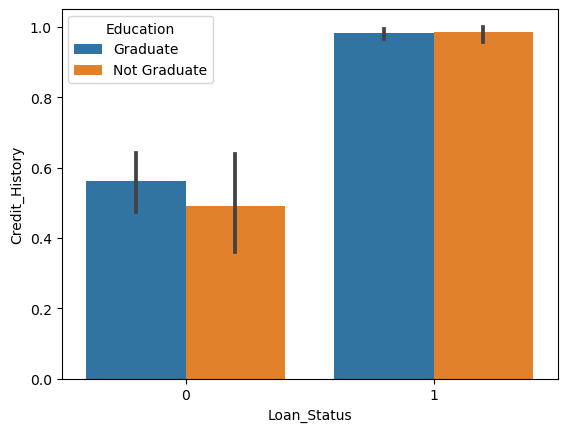

In [8]:
sns.barplot(y='Credit_History', x='Loan_Status', hue='Education',data = credit_df)

In [9]:
100 * credit_df.isnull().sum() / credit_df.shape[0]

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [10]:
DF = credit_df.drop('Loan_ID', axis = 1)

In [11]:
object_columns = DF.select_dtypes(include =['object']).columns
numeric_columns = DF.select_dtypes(exclude =['object']).columns

In [12]:
for column in object_columns:
    majority = DF[column].value_counts().iloc[0]
    DF[column].fillna(majority, inplace=True)

In [13]:
for column in numeric_columns:
    mean =  DF[column].mean()
    DF[column].fillna(mean, inplace=True)

In [14]:
mean

0.6872964169381107

In [15]:
DF.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [16]:
DF[object_columns].Married

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 614, dtype: object

In [17]:
DF[object_columns].Property_Area.head()

0    Urban
1    Rural
2    Urban
3    Urban
4    Urban
Name: Property_Area, dtype: object

In [18]:
DF_dummy = pd.get_dummies(DF, columns = object_columns)

In [19]:
DF_dummy.shape

(614, 25)

In [20]:
DF_dummy.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_489,Gender_Female,Gender_Male,Married_398,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_500,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,0,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True
1,4583,1508.0,128,360.0,1.0,0,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False
2,3000,0.0,66,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,False,True,False,False,True
3,2583,2358.0,120,360.0,1.0,1,False,False,True,False,...,False,False,False,True,False,True,False,False,False,True
4,6000,0.0,141,360.0,1.0,1,False,False,True,False,...,False,False,True,False,False,True,False,False,False,True


In [21]:
from sklearn.model_selection import train_test_split as TTS
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
X = DF_dummy.drop('Loan_Status', axis=1)
Y = DF_dummy.Loan_Status
train_x, test_x, train_y, test_y = TTS(X, Y, test_size = 0.3, random_state=42)

In [23]:
train_x.shape, test_x.shape

((429, 24), (185, 24))

In [24]:
svm_model = SVC(kernel='rbf', gamma=0.00001,C=1000)

In [25]:
svm_model.fit(train_x, train_y)

SVC(C=1000, gamma=1e-05)

In [26]:
train_y_hat = svm_model.predict(train_x)
test_y_hat = svm_model.predict(test_x)

In [27]:
print('-'*20, 'Train','-'*20)
print(classification_report(train_y, train_y_hat))
print('-'*20, 'Test', '-'*20)
print(classification_report(test_y, test_y_hat))

-------------------- Train --------------------
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.98      0.98      0.98       302

    accuracy                           0.97       429
   macro avg       0.96      0.96      0.96       429
weighted avg       0.97      0.97      0.97       429

-------------------- Test --------------------
              precision    recall  f1-score   support

           0       0.36      0.18      0.24        65
           1       0.65      0.82      0.73       120

    accuracy                           0.60       185
   macro avg       0.51      0.50      0.49       185
weighted avg       0.55      0.60      0.56       185



In [28]:
confusion_matrix(train_y, train_y_hat)

array([[121,   6],
       [  7, 295]], dtype=int64)